In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv


In [2]:
data=pd.read_csv('/kaggle/input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv')
data

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [3]:
missing=data.isnull().sum()
missing

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [4]:
data_1=data.copy()
data_1

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [5]:
#since there are more than 80% of missing in pos_spec_dt and onset_dt
#we are going to drop
data_1=data_1.drop(['onset_dt','pos_spec_dt'],axis=1)
data_1=data_1.dropna()
data_1

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [6]:
missing_1=data_1.isnull().sum()
missing_1

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [7]:
#to handle date time 
month=data_1['cdc_report_dt'].apply(lambda x:x.split('/')[1])
day=data_1['cdc_report_dt'].apply(lambda x:x.split('/')[2])
day

0          10
1          14
2          19
3          14
4          13
           ..
8405074    22
8405075    25
8405076    18
8405077    19
8405078    03
Name: cdc_report_dt, Length: 8404990, dtype: object

In [8]:
data_2=data_1.copy()
data_2

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
...,...,...,...,...,...,...,...,...,...
8405074,2020/10/22,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


In [9]:
data_2['cdc_report_day']=day
data_2['cdc_report_month']=month
data_2=data_2.drop(['cdc_report_dt'],axis=1)
data_2

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,cdc_report_day,cdc_report_month
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,10,11
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,14,11
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,19,11
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,14,11
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,13,11
...,...,...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing,22,10
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,25,10
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,18,07
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,19,11


In [10]:
unique= data_2.nunique()
unique

current_status                    2
sex                               5
age_group                        10
Race and ethnicity (combined)     9
hosp_yn                           4
icu_yn                            4
death_yn                          4
medcond_yn                        4
cdc_report_day                   31
cdc_report_month                 11
dtype: int64

In [11]:
columns_cat=data_2[['sex','age_group','Race and ethnicity (combined)','hosp_yn','icu_yn','death_yn','medcond_yn','current_status']]


In [12]:
columns_cat

,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,current_status
0,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,Laboratory-confirmed case
1,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,Laboratory-confirmed case
2,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,Laboratory-confirmed case
3,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,Laboratory-confirmed case
4,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,Laboratory-confirmed case
...,...,...,...,...,...,...,...,...
8405074,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing,Probable Case
8405075,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,Laboratory-confirmed case
8405076,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,Laboratory-confirmed case
8405077,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,Laboratory-confirmed case


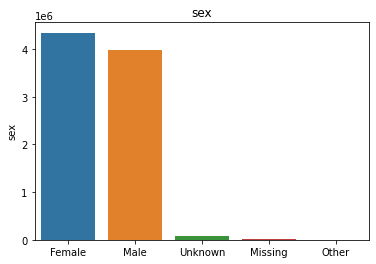

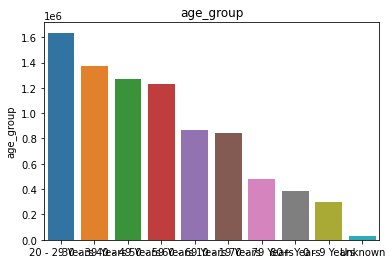

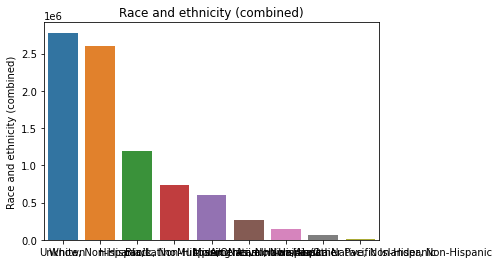

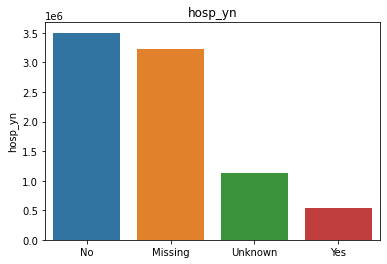

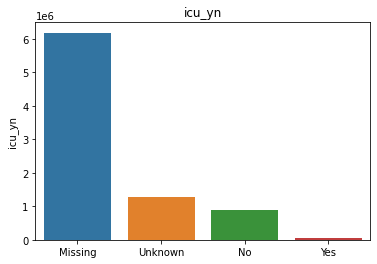

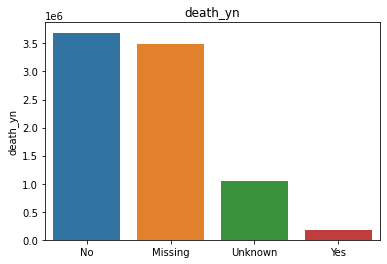

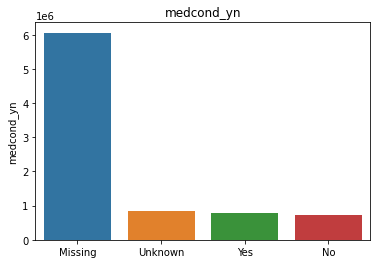

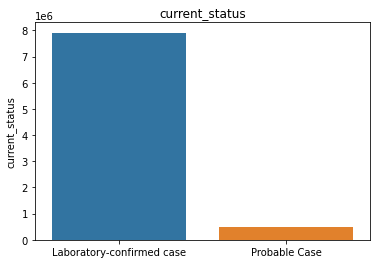

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in columns_cat:
    sns.barplot(columns_cat[i].value_counts().index,columns_cat[i].value_counts()).set_title(i)
    plt.show()

In [14]:
print(pd.pivot_table(data_2,index='current_status',columns='sex',aggfunc='count'))
print(pd.pivot_table(data_2,index='current_status',columns='age_group',aggfunc='count'))
print(pd.pivot_table(data_2,index='current_status',columns='Race and ethnicity (combined)',aggfunc='count'))
print(pd.pivot_table(data_2,index='current_status',columns='hosp_yn',aggfunc='count'))
print(pd.pivot_table(data_2,index='current_status',columns='icu_yn',aggfunc='count'))
print(pd.pivot_table(data_2,index='current_status',columns='death_yn',aggfunc='count'))

                          Race and ethnicity (combined)                   \
sex                                              Female     Male Missing   
current_status                                                             
Laboratory-confirmed case                       4078817  3747939   14535   
Probable Case                                    262081   222652    4973   

                                        age_group                         \
sex                       Other Unknown    Female     Male Missing Other   
current_status                                                             
Laboratory-confirmed case   114   68632   4078817  3747939   14535   114   
Probable Case                41    5206    262081   222652    4973    41   

                                   ...   icu_yn                         \
sex                       Unknown  ...   Female     Male Missing Other   
current_status                     ...                                   
Laboratory-confi

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [16]:
data_3=data_2.copy()
data_3

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,cdc_report_day,cdc_report_month
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,10,11
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,14,11
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,19,11
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,14,11
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,13,11
...,...,...,...,...,...,...,...,...,...,...
8405074,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing,22,10
8405075,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,25,10
8405076,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,18,07
8405077,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing,19,11


In [17]:
data_3['sex']= label_encoder.fit_transform(data_3['sex'])
data_3['age_group']= label_encoder.fit_transform(data_3['age_group'])
data_3['Race and ethnicity (combined)']= label_encoder.fit_transform(data_3['Race and ethnicity (combined)'])
data_3['hosp_yn']= label_encoder.fit_transform(data_3['hosp_yn'])
data_3['icu_yn']= label_encoder.fit_transform(data_3['icu_yn'])
data_3['death_yn']= label_encoder.fit_transform(data_3['death_yn'])
data_3['medcond_yn']= label_encoder.fit_transform(data_3['medcond_yn'])  
data_3                                                         

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,cdc_report_day,cdc_report_month
0,Laboratory-confirmed case,1,1,2,1,2,1,1,10,11
1,Laboratory-confirmed case,1,1,2,1,1,1,1,14,11
2,Laboratory-confirmed case,1,1,2,1,1,1,1,19,11
3,Laboratory-confirmed case,1,1,2,0,0,1,0,14,11
4,Laboratory-confirmed case,1,1,2,1,1,1,3,13,11
...,...,...,...,...,...,...,...,...,...,...
8405074,Probable Case,2,3,7,1,2,1,0,22,10
8405075,Laboratory-confirmed case,2,3,7,0,0,0,0,25,10
8405076,Laboratory-confirmed case,2,3,7,0,0,0,0,18,07
8405077,Laboratory-confirmed case,2,3,7,0,0,0,0,19,11


In [18]:
data_3['current_status']= label_encoder.fit_transform(data_3['current_status'])

In [19]:
X=data_3.drop(['current_status'],axis=1)
Y=data_3['current_status']
from sklearn.model_selection import train_test_split
X_Train,X_test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_Train,Y_Train)
prediction = model.predict(X_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(Y_Test,prediction)
print(accuracy_score)

0.9412152780669578


In [22]:
submission=pd.DataFrame({"current_status":prediction})

In [23]:
submission.to_csv('covid_19.csv')